# I. Data Importing

The data available is in the JSON and Parquet format. JSON is a standard format when scrapping data from webpages. Parquet format is a file format usually used for storing big data in Hadoop. Both file formats could be imported using the pandas library.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

In [3]:
json.load(open('/content/drive/MyDrive/youtube-categories.json'))[0]

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'kind': 'youtube#videoCategory',
 'snippet': {'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation'}}

The JSON file has a nested column in it on the column 'snippet'. To flatten it, I am going to use pd.json_normalize and then concatenate it with the rest of the columns.

In [4]:
df1=pd.read_json("/content/drive/MyDrive/youtube-categories.json")
df2=pd.json_normalize(df1['snippet'])
df_j=pd.concat([df1[['kind','etag','id']],df2],axis=1)
df_j.head()

,kind,etag,id,channelId,title,assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [5]:
df_p=pd.read_parquet('/content/drive/MyDrive/youtube-videos.parquet', engine='pyarrow')
df_p.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


I am going to merge the two dataframes with left join on the category id of the df_p dataframes

In [6]:
df=df_p.merge(df_j,how='left',left_on='category_id',right_on='id',suffixes=['_videos','_category'])
df.head()

,video_id,trending_date,title_videos,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,channelId,title_category,assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",23,UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [7]:
print('Shape of the data:{}'.format(df.shape))
df.describe(include='all')

Shape of the data:(40949, 22)


,video_id,trending_date,title_videos,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,channelId,title_category,assignable
count,40949,40949,40949,40949,40949.000000,40949,40949,4.094900e+04,4.094900e+04,4.094900e+04,...,40949,40949,40949,40379,40949,40949,40949.000000,40949,40949,40949
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,...,2,2,2,6901,1,16,NaN,1,16,2
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,...,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",NaN,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
freq,30,200,30,203,NaN,50,1535,NaN,NaN,NaN,...,40316,40780,40926,58,40949,9964,NaN,40949,9964,40892
mean,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,2.360785e+06,7.426670e+04,3.711401e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,7.394114e+06,2.288853e+05,2.902971e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.423290e+05,5.424000e+03,2.020000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.818610e+05,1.809100e+04,6.310000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.823157e+06,5.541700e+04,1.938000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN


- 'channelId' and 'kind' only has one values, which means it's useless for the analysis.
- 'video_id' and 'title_video' has top values, which suggest that there are videos that became viral more than once.

# II. Data Cleaning

In [8]:
#Drop unnecessary columns
df=df.drop(['kind','id','category_id','channelId'],axis=1)
df.head()

,video_id,trending_date,title_videos,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,etag,title_category,assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",People & Blogs,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...","""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",Entertainment,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"""m2yskBQFythfE4irbTIeOgYYfBU/G9LHzQmx44rX2S5ya...",Comedy,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",Entertainment,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",Entertainment,True


## 1. Checking Datatypes

In [9]:
df.dtypes

video_id                  object
trending_date             object
title_videos              object
channel_title             object
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
etag                      object
title_category            object
assignable                  bool
dtype: object

In [10]:
#Changing trending_date type to datetime
df['trending_date']=pd.to_datetime(df['trending_date'],format='%y.%d.%m',utc=True)
#Changing publish_time type to datetime
df['publish_time']=pd.to_datetime(df['publish_time'])
df.dtypes

video_id                               object
trending_date             datetime64[ns, UTC]
title_videos                           object
channel_title                          object
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
etag                                   object
title_category                         object
assignable                               bool
dtype: object

## 2. Check for Null Values

In [11]:
df.isna().sum()

video_id                    0
trending_date               0
title_videos                0
channel_title               0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
etag                        0
title_category              0
assignable                  0
dtype: int64

# III. Exploratory Data Analysis

## 1. How Many Views to Become Trending?

By taking a look at the first rows of the data, we could see that the trending videos have varying number of views. And as I previously mentioned, there are many videos that became trending more than once. Hence, to quantify the condition where the video becomes trending, I would first need to find out the first day the videos become trending and then see how many views those videos get on the first day of trending.

In [12]:
#Partition the data by title_videos and sort it based on the trending_date
df_sorted=df.copy().sort_values(['title_videos','trending_date'])

#Create the trending_days column that indicates how many days the video has been trending
trending_days=[]
row_number=0
videos=""
for x in df_sorted['title_videos']:
  if x!=videos:
    videos=x
    row_number=1
  else:
    row_number+=1
  trending_days.append(row_number)
df_sorted['trending_days']=trending_days
df_sorted[['title_videos','trending_date','trending_days']].head(10)

,title_videos,trending_date,trending_days
4760,#184 Making a PCB using EasyEDA. // Review,2017-12-07 00:00:00+00:00,1
3452,"#23 Feed The Homeless | One List, One Life",2017-12-01 00:00:00+00:00,1
3694,"#23 Feed The Homeless | One List, One Life",2017-12-02 00:00:00+00:00,2
3898,"#23 Feed The Homeless | One List, One Life",2017-12-03 00:00:00+00:00,3
4132,"#23 Feed The Homeless | One List, One Life",2017-12-04 00:00:00+00:00,4
4348,"#23 Feed The Homeless | One List, One Life",2017-12-05 00:00:00+00:00,5
4578,"#23 Feed The Homeless | One List, One Life",2017-12-06 00:00:00+00:00,6
10277,#57: AM and SSB explained,2018-01-04 00:00:00+00:00,1
10538,#57: AM and SSB explained,2018-01-05 00:00:00+00:00,2
10773,#57: AM and SSB explained,2018-01-06 00:00:00+00:00,3


I am only interested on the first day the videos became trending. Thus, I am going to create a new dataframe that only includes the trending_days = 1

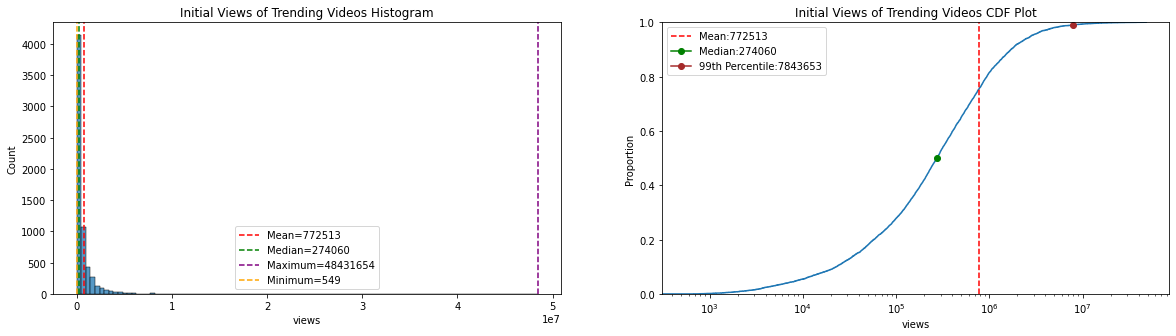

In [13]:
first_day_trending=df_sorted[df_sorted['trending_days']==1]

fig,ax=plt.subplots(figsize=(20,5),ncols=2,nrows=1)
def create_histogram(df, column, bins=200, title='Histogram',ax=ax):
  sns.histplot(x=df[column],bins=bins,ax=ax)
  ax.axvline(np.mean(df[column]),label='Mean={}'.format(round(np.mean(df[column]))),color='red',linestyle='--')
  ax.axvline(np.median(df[column]),label='Median={}'.format(round(np.median(df[column]))),color='green',linestyle='--')
  ax.axvline(np.max(df[column]),label='Maximum={}'.format(round(np.max(df[column]))),color='purple',linestyle='--')
  ax.axvline(np.min(df[column]),label='Minimum={}'.format(round(np.min(df[column]))),color='orange',linestyle='--')
  ax.set_title(title)
  ax.legend()

def create_cdf(df,column,ax=ax,title='CDF Plot'):
  sns.ecdfplot(x=column,data=df,ax=ax)
  ax.set_title(title)
  ax.axvline(np.mean(df[column]),linestyle='--',
             label='Mean:{}'.format(round(np.mean(df[column]))),
             color='red')
  ax.plot(np.median(df[column]),0.5,marker='o',
          label='Median:{}'.format(round(np.median(df[column]))),
          color='green')
  ax.plot(np.percentile(df[column],99),0.99,marker='o',
          label='99th Percentile:{}'.format(round(np.percentile(df[column],99))),
          color='brown')
  ax.legend()


create_histogram(first_day_trending,'views',100,'Initial Views of Trending Videos Histogram',ax=ax[0])
create_cdf(first_day_trending,'views',ax=ax[1],title='Initial Views of Trending Videos CDF Plot')
ax[1].set_xscale('log')
plt.show()

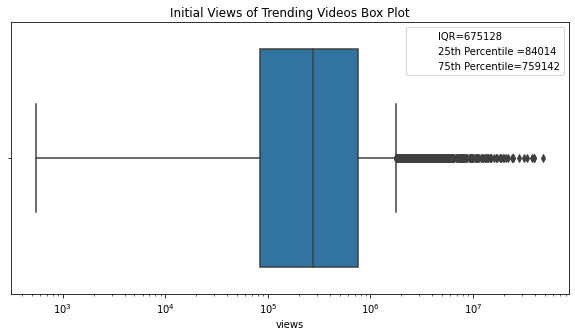

In [14]:
def create_boxplot(df,column,ax=ax,title='Box Plot'):
  sns.boxplot(x=column,data=df,ax=ax)
  ax.set_title(title)
  ax.axvline(np.percentile(df[column],75)-np.percentile(df[column],25),
            label='IQR={}'.format(round(np.percentile(df[column],75)-np.percentile(df[column],25))),
            linestyle='')
  ax.axvline(np.percentile(df[column],25),
            label='25th Percentile ={}'.format(round(np.percentile(df[column],25))),
            linestyle='')
  ax.axvline(np.percentile(df[column],75),
            label='75th Percentile={}'.format(round(np.percentile(df[column],75))),
            linestyle='')
  ax.legend()

fig,ax=plt.subplots(figsize=(10,5))
create_boxplot(first_day_trending,'views',ax=ax,title='Initial Views of Trending Videos Box Plot')
ax.set_xscale('log')

plt.show()

- The distribution of the videos' views on their first day became trending is very right skewed with long tail.
- The median of the data is 274060 views and the mean is 772513 views.
- 25% of the data observed have views equal or less than 84014 views
- 75% of the data observed have views equal or less than 759142 views.
- 99% of the trending videos have less than 7843652 views on their first day of becoming trending.
- The IQR of the data is 675127 and outliers are data with views more than 75th percentile + 1.5 IQR = 1771834 views)

## 2. How Long Since Published Did the Videos Become Trending?

By taking a look at the first rows of the table, we could also see that the videos takes time to become trending. I am interested to know how long does the typical trending videos took to become trending since it was published.<br/>
The metric for time that I am going to use is hours, because there are many videos that become trending in the same day that it was published. And also since the trending date does not contain the information of time, I am assuming it to be by the end of that particular day, that is at 23:59:59.

In [15]:
first_day_trending=first_day_trending.copy()
first_day_trending.loc[:,'publish_to_trending(Hours)']=((first_day_trending['trending_date']+datetime.timedelta(hours=23,minutes=59,seconds=59))-first_day_trending['publish_time']).dt.total_seconds()/3600

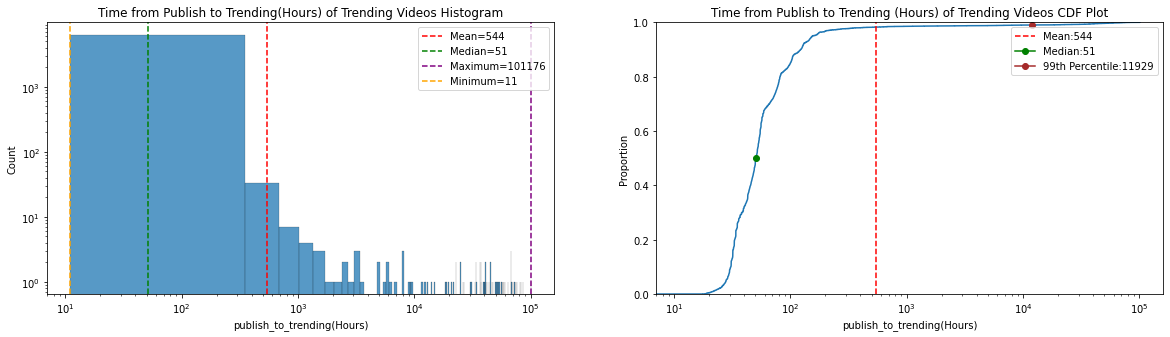

In [16]:
fig,ax=plt.subplots(figsize=(20,5),ncols=2,nrows=1)
create_histogram(first_day_trending,"publish_to_trending(Hours)",300,'Time from Publish to Trending(Hours) of Trending Videos Histogram',ax=ax[0])
ax[0].set_xscale('log')
ax[0].set_yscale('log')

create_cdf(first_day_trending,'publish_to_trending(Hours)',ax=ax[1],title='Time from Publish to Trending (Hours) of Trending Videos CDF Plot')
ax[1].set_xscale('log')
plt.show()

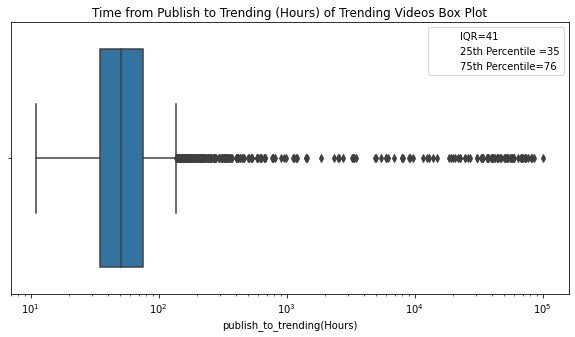

In [17]:
fig,ax=plt.subplots(figsize=(10,5))
create_boxplot(first_day_trending,'publish_to_trending(Hours)',ax=ax,title='Time from Publish to Trending (Hours) of Trending Videos Box Plot')
ax.set_xscale('log')
plt.show()

- The distribution of the publish to trending hours is also right skewed with long tail.
- The median of the data is 51 hours(~ 2 days) while the mean is 544 hours (~23 days).
- 25% of the data become trending after equal to or less than 35 hours (~ 1.5 days)
- 75% of the data become trending after equal to or less than 76 hours (~ 3 days)
- 99% of the videos become trending after less than 11929 hours (497 days)
- The IQR of the data is 41 hours and the outliers are videos that become trending after more than 137.5 hours (~6 days) since it was published

## 3. How Fast Does the Trending Videos' Get their Views Since It was Published?

From previous analysis, we see that the initial views when the videos become trending and the time they take to become trending are varies. Which suggest each videos have different view rate: the speed of which the videos get their views. I am interested to see what are the typical view rate of trending videos.

In [18]:
first_day_trending.loc[:,'views_per_hour']=round(first_day_trending['views']/first_day_trending['publish_to_trending(Hours)'],2)
first_day_trending.head()

,video_id,trending_date,title_videos,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,etag,title_category,assignable,trending_days,publish_to_trending(Hours),views_per_hour
4760,BPmgDhwbd1w,2017-12-07 00:00:00+00:00,#184 Making a PCB using EasyEDA. // Review,MickMake,2017-12-02 14:05:07+00:00,"MickMake|""electronics""|""embedded""|""maker""|""diy...",3237,161,2,35,...,False,False,False,"If you're at the point of making your own PCB,...","""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",Science & Technology,True,1,129.914444,24.92
3452,4qakFfGRV4E,2017-12-01 00:00:00+00:00,"#23 Feed The Homeless | One List, One Life","One List , One Life",2017-11-30 15:36:12+00:00,"homeless|""experiment""|""people""|""man""|""singing""...",32385,568,77,97,...,False,False,False,Learn more about us: https://mybestfriendslist...,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",People & Blogs,True,1,32.396389,999.65
10277,l7n58h-Zj3I,2018-01-04 00:00:00+00:00,#57: AM and SSB explained,Radio Physics and Electronics,2017-12-24 19:15:29+00:00,"AM|""SSB""|""amplitude modulation""|""single sideba...",3287,79,3,19,...,False,False,False,In this video we explore some of the simple ma...,"""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",Science & Technology,True,1,268.741667,12.23
3177,oWithLP0VlQ,2017-11-29 00:00:00+00:00,"#AboveTheNoise feat. Serena Williams, Neymar J...",Beats by Dre,2017-11-22 17:23:20+00:00,[none],2152261,7824,158,324,...,False,False,False,"In a loud world full of distractions, it's nev...","""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",Music,True,1,174.610833,12326.05
10727,FQp6F0PjfpI,2018-01-06 00:00:00+00:00,#DisneyParksLIVE: Fantasy In The Sky New Years...,Disney Parks,2018-01-01 05:11:37+00:00,"Fantasy In The Sky New Years Eve Fireworks|""Di...",130416,1812,30,110,...,False,False,False,Disney,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",Entertainment,True,1,138.806111,939.56


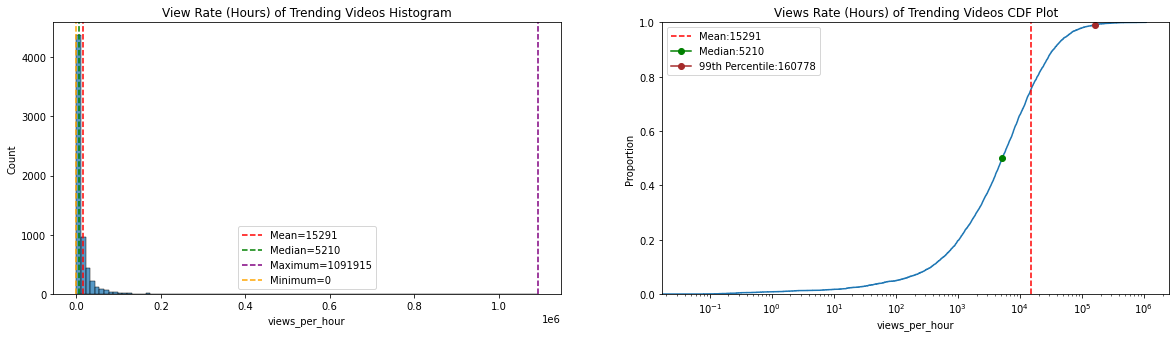

In [19]:
fig,ax=plt.subplots(figsize=(20,5),ncols=2,nrows=1)
create_histogram(first_day_trending,'views_per_hour',100,'View Rate (Hours) of Trending Videos Histogram',ax=ax[0])
create_cdf(first_day_trending,'views_per_hour',ax=ax[1],title='Views Rate (Hours) of Trending Videos CDF Plot')
ax[1].set_xscale('log')
plt.show()

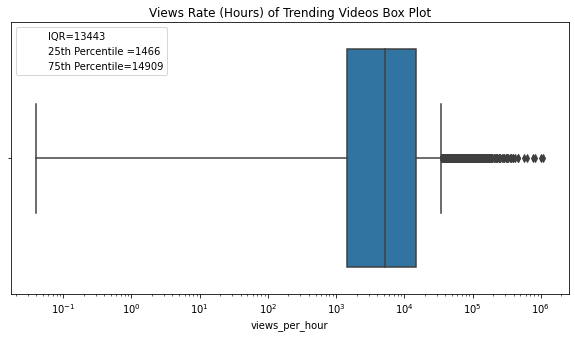

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
create_boxplot(first_day_trending,'views_per_hour',ax=ax,title='Views Rate (Hours) of Trending Videos Box Plot')
ax.set_xscale('log')
plt.show()

- The distribution of the views per hour rate is also very right skewed with long tail.
- The median of the data is 5210 views per hour and the mean is 15291 views per hour.
- 25% of the data observed have view rate equal or less than 1466 views per hour.
- 75% of the data observed have view rate equal or less than 14909 views per hour.
- 99% of the trending videos have view rate equal or less than 160778 views per hour.
- The IQR (75th Percentile + 1.5*IQR) of the data is 13443 views per hour and outliers are videos with view rate above 35074 views per hour

## 4. How Does Likes and Comments Contribute to Making a Video Trending

Likes, dislikes, and comments could suggest that the viewers are engaging in the video, which probably contribute in making the video trending

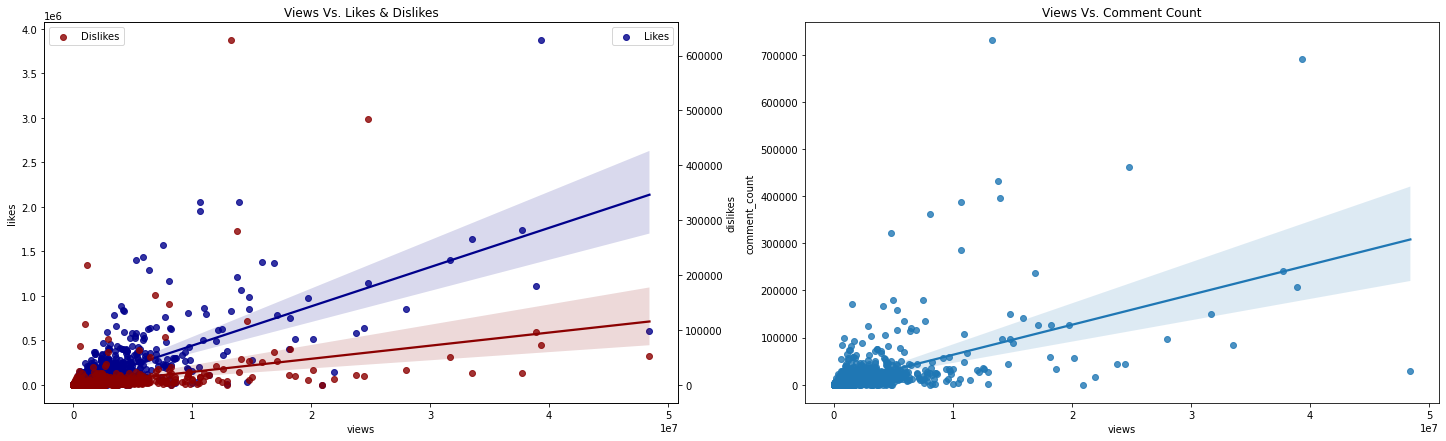

In [21]:
fig,ax=plt.subplots(figsize=(25,7),ncols=2,nrows=1)

sns.regplot(x='views',y='likes',data=first_day_trending,color='darkblue',label='Likes',ax=ax[0])
ax2=ax[0].twinx()
sns.regplot(x='views',y='dislikes',data=first_day_trending,color='darkred',ax=ax2,label='Dislikes')
ax[0].set_title('Views Vs. Likes & Dislikes')
ax[0].legend(loc=1)
ax2.legend(loc=2)

sns.regplot(x='views',y='comment_count',data=first_day_trending,ax=ax[1])
ax[1].set_title('Views Vs. Comment Count')
plt.show()

- Likes and dislikes tend to increase with views, but trending videos typically have more likes than dislikes.
- Comment counts are also tend to increase with views, which suggest that trending videos tend to make the viewers engage with the videos via the comment section.

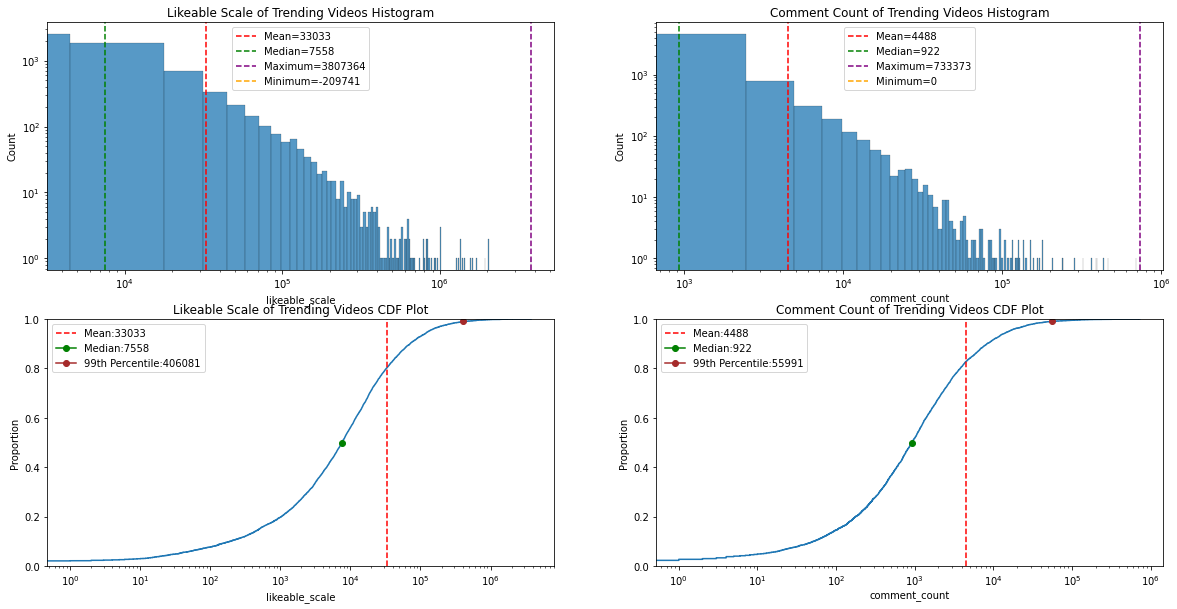

In [22]:
first_day_trending.loc[:,'likeable_scale']=first_day_trending['likes']-first_day_trending['dislikes']

fig,ax=plt.subplots(figsize=(20,10),ncols=2,nrows=2)
create_histogram(first_day_trending,"likeable_scale",300,'Likeable Scale of Trending Videos Histogram',ax=ax[0,0])
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')

create_histogram(first_day_trending,"comment_count",300,'Comment Count of Trending Videos Histogram',ax=ax[0,1])
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')

create_cdf(first_day_trending,'likeable_scale',ax=ax[1,0],title='Likeable Scale of Trending Videos CDF Plot')
ax[1,0].set_xscale('log')

create_cdf(first_day_trending,'comment_count',ax=ax[1,1],title='Comment Count of Trending Videos CDF Plot')
ax[1,1].set_xscale('log')

plt.show()

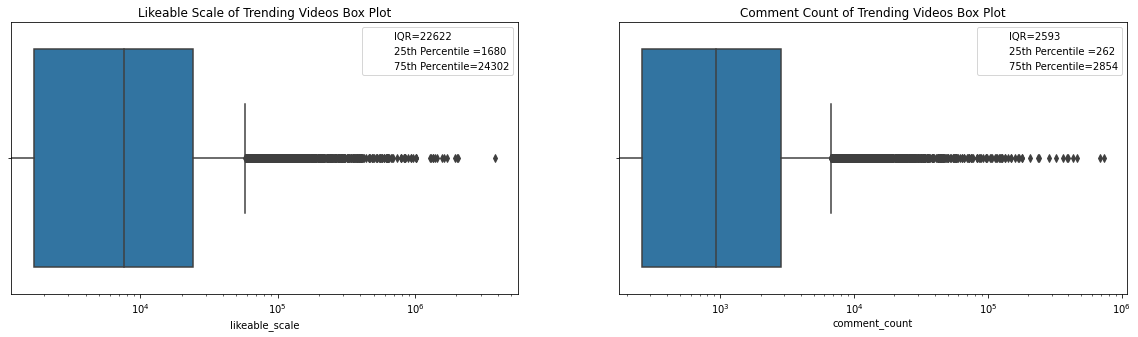

In [23]:
fig,ax=plt.subplots(figsize=(20,5),nrows=1,ncols=2)
create_boxplot(first_day_trending,'likeable_scale',ax=ax[0],title='Likeable Scale of Trending Videos Box Plot')
ax[0].set_xscale('log')

create_boxplot(first_day_trending,'comment_count',ax=ax[1],title='Comment Count of Trending Videos Box Plot')
ax[1].set_xscale('log')
plt.show()

- Trending videos typically have more likes than comments.
- The observed data have the likeable scale (likes - dislikes) mean of 33033 and median of 7558, while the mean of comment counts are 4488 and the median is 922.
- 25 th percentile of the observed data have likeable scale equal or less than 1680 and comment counts equal or less than 262.
- 75% of the observed data have likeable scale equal or less than 24302 and comment counts equal or less than 2854
- 99% of the observed data have likeable scale equal or less than 406081 and comment counts equal or less than 55991
- The IQR of the likeable scale is 22622 and 2593 for the comment counts.
- Outliers are data with likeable scale more than 58235 or comment counts more than 6744

## 5. What is the Most Common Trending Categories?

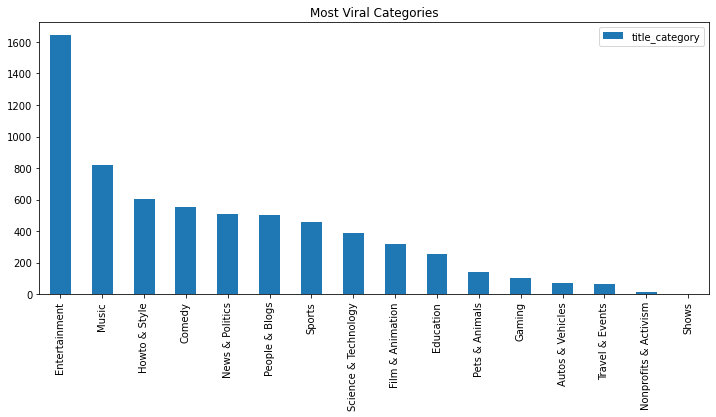

In [24]:
category=first_day_trending['title_category'].value_counts(sort=True)
category_ratio=category/np.sum(category)*100

fig,ax=plt.subplots(figsize=(12,5))
category.plot(kind='bar')

plt.title('Most Viral Categories')
plt.legend()
plt.show()

- Entertainment is the most common category of trending videos, followed by Music and Howto & styles

## 6. What Are Trending Videos' Title Characteristics?

Title is the part of the videos that the potential viewer are going to read first. Thus, there might be some things that the titles of trending videos have that make the potential viewer to become interested in clicking and viewing the videos. I am interested to see what those are. To analyze the title, I am going to make 4 different approach, that is: 1. How many character does the trending videos typically have? 2. What are the most frequent words in the titles? 3. How is the polarity of the titles? 4. What languages does the titles used?

### 6.1 Character Count

In [25]:
#first_day_trending=first_day_trending.set_index('video_id')
first_day_trending['character_count']=first_day_trending['title_videos'].apply(lambda x: len(x))
first_day_trending.head()

,video_id,trending_date,title_videos,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,etag,title_category,assignable,trending_days,publish_to_trending(Hours),views_per_hour,likeable_scale,character_count
4760,BPmgDhwbd1w,2017-12-07 00:00:00+00:00,#184 Making a PCB using EasyEDA. // Review,MickMake,2017-12-02 14:05:07+00:00,"MickMake|""electronics""|""embedded""|""maker""|""diy...",3237,161,2,35,...,False,"If you're at the point of making your own PCB,...","""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",Science & Technology,True,1,129.914444,24.92,159,42
3452,4qakFfGRV4E,2017-12-01 00:00:00+00:00,"#23 Feed The Homeless | One List, One Life","One List , One Life",2017-11-30 15:36:12+00:00,"homeless|""experiment""|""people""|""man""|""singing""...",32385,568,77,97,...,False,Learn more about us: https://mybestfriendslist...,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",People & Blogs,True,1,32.396389,999.65,491,42
10277,l7n58h-Zj3I,2018-01-04 00:00:00+00:00,#57: AM and SSB explained,Radio Physics and Electronics,2017-12-24 19:15:29+00:00,"AM|""SSB""|""amplitude modulation""|""single sideba...",3287,79,3,19,...,False,In this video we explore some of the simple ma...,"""m2yskBQFythfE4irbTIeOgYYfBU/w5HjcTD82G_XA3xBc...",Science & Technology,True,1,268.741667,12.23,76,25
3177,oWithLP0VlQ,2017-11-29 00:00:00+00:00,"#AboveTheNoise feat. Serena Williams, Neymar J...",Beats by Dre,2017-11-22 17:23:20+00:00,[none],2152261,7824,158,324,...,False,"In a loud world full of distractions, it's nev...","""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",Music,True,1,174.610833,12326.05,7666,99
10727,FQp6F0PjfpI,2018-01-06 00:00:00+00:00,#DisneyParksLIVE: Fantasy In The Sky New Years...,Disney Parks,2018-01-01 05:11:37+00:00,"Fantasy In The Sky New Years Eve Fireworks|""Di...",130416,1812,30,110,...,False,Disney,"""m2yskBQFythfE4irbTIeOgYYfBU/UVB9oxX2Bvqa_w_y3...",Entertainment,True,1,138.806111,939.56,1782,75


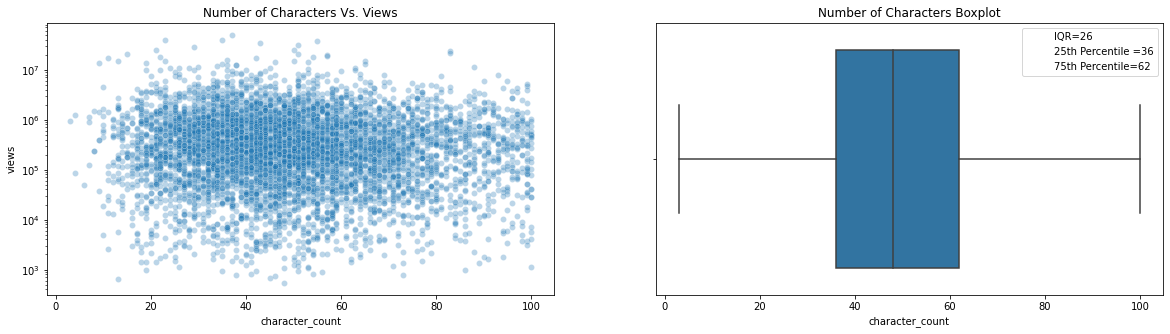

In [26]:
fig,ax=plt.subplots(figsize=(20,5),ncols=2,nrows=1)
sns.scatterplot(x='character_count',y='views',data=first_day_trending,alpha=0.3,ax=ax[0])
ax[0].set_title('Number of Characters Vs. Views')
ax[0].set_yscale('log')

create_boxplot(first_day_trending,'character_count',ax=ax[1],title='Number of Characters Boxplot')
plt.legend()
plt.show()

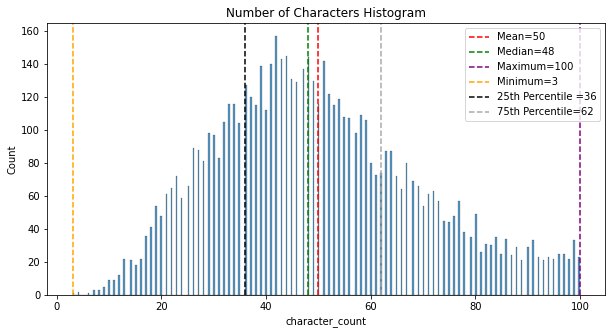

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
create_histogram(first_day_trending,'character_count',300,'Number of Characters Histogram',ax=ax)
ax.axvline(np.percentile(first_day_trending['character_count'],25),
           label='25th Percentile ={}'.format(round(np.percentile(first_day_trending['character_count'],25))),
           linestyle='--',color='black')
ax.axvline(np.percentile(first_day_trending['character_count'],75),
           label='75th Percentile={}'.format(round(np.percentile(first_day_trending['character_count'],75))),
           linestyle='--',color='darkgrey')
plt.legend()
plt.show()

- There are no correlation between the number of characters of the title to the number of views.
- However, trending videos typically have at least 3 - 100 characters on their titles with the median of 48 and the mean of 50.
- The IQR of the character count is 26 with 36 as the 25th percentile and 62 as the 75th percentile.


### 6.2 Most Frequent Words

In [28]:
title=first_day_trending[['video_id','title_videos','trending_date']].copy()
title=title.set_index('video_id')
title.head()

,title_videos,trending_date
video_id,,
BPmgDhwbd1w,#184 Making a PCB using EasyEDA. // Review,2017-12-07 00:00:00+00:00
4qakFfGRV4E,"#23 Feed The Homeless | One List, One Life",2017-12-01 00:00:00+00:00
l7n58h-Zj3I,#57: AM and SSB explained,2018-01-04 00:00:00+00:00
oWithLP0VlQ,"#AboveTheNoise feat. Serena Williams, Neymar J...",2017-11-29 00:00:00+00:00
FQp6F0PjfpI,#DisneyParksLIVE: Fantasy In The Sky New Years...,2018-01-06 00:00:00+00:00


In [29]:
import string

def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

title['title_videos']=title['title_videos'].apply(lambda x: clean_text(x))
title['title_videos']=title['title_videos'].apply(lambda x: remove_emojis(x))

In [30]:
title.head()

,title_videos,trending_date
video_id,,
BPmgDhwbd1w,making a pcb using easyeda review,2017-12-07 00:00:00+00:00
4qakFfGRV4E,feed the homeless one list one life,2017-12-01 00:00:00+00:00
l7n58h-Zj3I,am and ssb explained,2018-01-04 00:00:00+00:00
oWithLP0VlQ,abovethenoise feat serena williams neymar jr c...,2017-11-29 00:00:00+00:00
FQp6F0PjfpI,disneyparkslive fantasy in the sky new years e...,2018-01-06 00:00:00+00:00


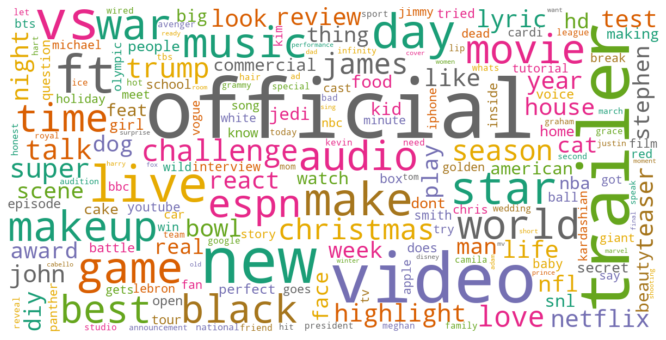

In [31]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

title_all=' '.join(title['title_videos'])
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS,background_color="white", colormap="Dark2",
               max_font_size=150, collocations=False,width=1200, height=600,random_state=41)
wc.generate(title_all)

fig,ax=plt.subplots(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

- Some of the most popular words that were used as title are official and new which suggest that original content are quite common as trending videos.
- Other words such as video, game, music, movie, and make up suggest that trending videos are generally an artistic contents.
- There is also a word such as christmast which I assume only popular in december, which interest me to dig deeper to find out if there are any content that specificly popular only in one particular month.

In [32]:
title['year_month']=title['trending_date'].dt.to_period('M')
title.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,title_videos,trending_date,year_month
video_id,,,
BPmgDhwbd1w,making a pcb using easyeda review,2017-12-07 00:00:00+00:00,2017-12
4qakFfGRV4E,feed the homeless one list one life,2017-12-01 00:00:00+00:00,2017-12
l7n58h-Zj3I,am and ssb explained,2018-01-04 00:00:00+00:00,2018-01
oWithLP0VlQ,abovethenoise feat serena williams neymar jr c...,2017-11-29 00:00:00+00:00,2017-11
FQp6F0PjfpI,disneyparkslive fantasy in the sky new years e...,2018-01-06 00:00:00+00:00,2018-01


In [33]:
month_dict={}
for x in title.set_index('year_month').index:
  month_dict[x]=" ".join(title.set_index('year_month').loc[x,'title_videos'])

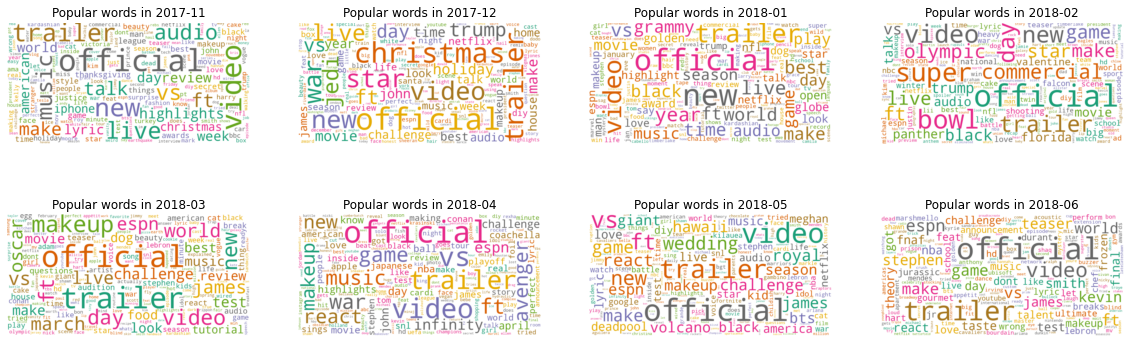

In [34]:
plt.rcParams['figure.figsize'] = [20, 10]
wc = WordCloud(stopwords=text.ENGLISH_STOP_WORDS,background_color="white", colormap="Dark2",
               max_font_size=150, collocations=False,width=1200, height=600,random_state=41)
for i,x in enumerate(sorted(month_dict.keys())):
  wc.generate(month_dict[x])
  plt.subplot(3, 4, i+1)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title('Popular words in {}'.format(x))

plt.show()

- In february, super and bowl are popular words in a trending videos titles, which is because the american Super Bowl is held in February.
- In march, oscar is also a popular word which is because the Oscars is held in March.
- Other words such as grammy, royal wedding, avengers, and christmast are popular events or occurances that were happening in that specific months.
- Hence, it seems that **the contents of popular videos tends to include the popular events that were happening at that particular moment.**

### 6.3 Polarity Of the Title

In [35]:
from textblob import TextBlob

title['polarity'] = title['title_videos'].apply(lambda x: TextBlob(x).sentiment.polarity)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


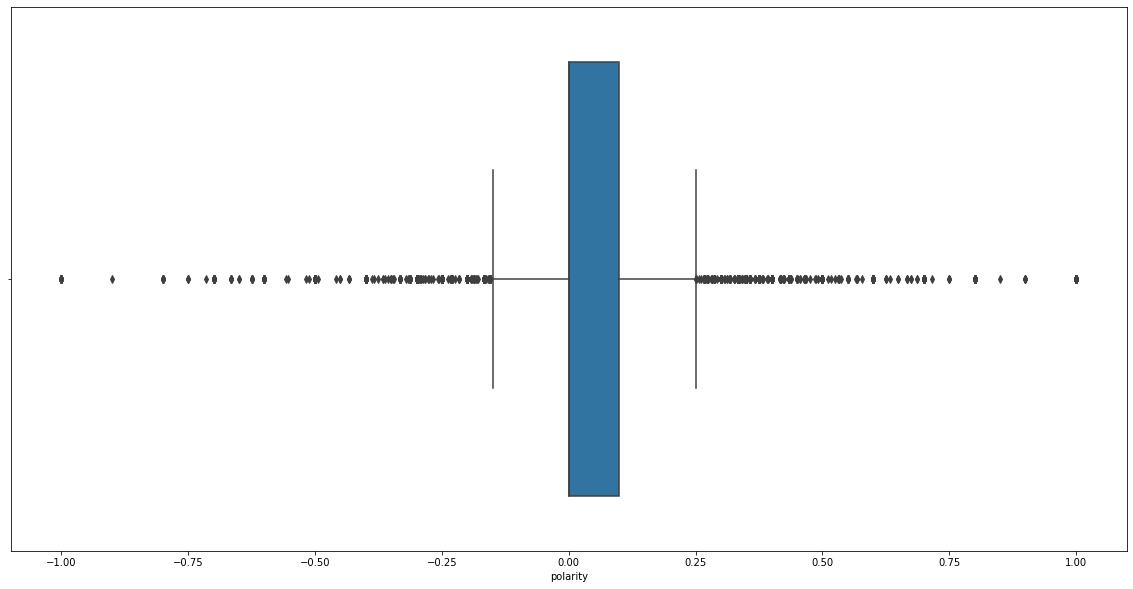

In [36]:
sns.boxplot(title['polarity'])

- The polarity of trending videos' titles are varies, but they are generally positive.

### 6.4 Languages of the Titles

In [37]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=fca4c5a4807b7b074f909bc482bc5392d10362f769019b72ab458be9d267df02
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [38]:
from langdetect import detect

textlang = title['title_videos']
langdet = []   
for i in range(len(title)):                                         
    try:                                                          
       lang=detect(textlang[i])                                      
    except:                                                       
       lang='unkwnown'             
    langdet.append(lang)
title['language']=langdet

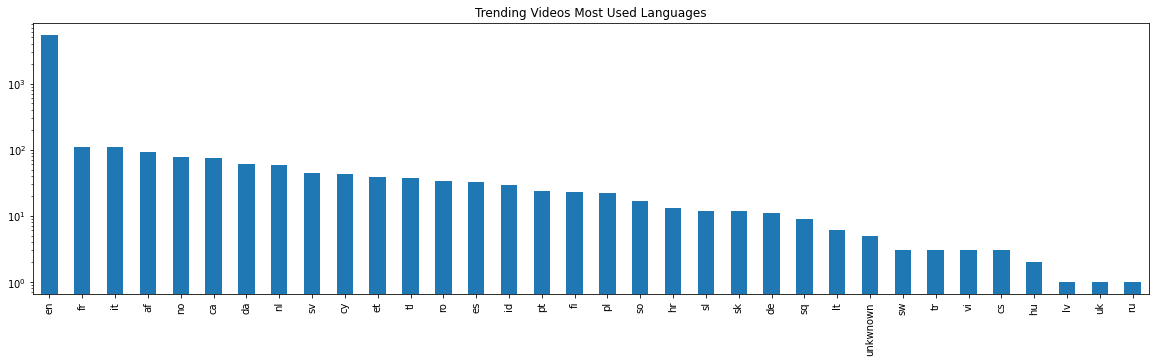

In [39]:
fig,ax=plt.subplots(figsize=(20,5))
title['language'].value_counts(sort=True).plot(kind='bar')
plt.title('Trending Videos Most Used Languages')
plt.yscale('log')
plt.show()

- English is the most popular languages in a title, followed by french and italian.

## 7. What Are Trending Videos Description Characteristics?

In [40]:
description=first_day_trending.set_index('video_id')[['description']].copy()
description=description.dropna()

description['description']=description['description'].apply(lambda x: clean_text(x))
description['description']=description['description'].apply(lambda x: remove_emojis(x))

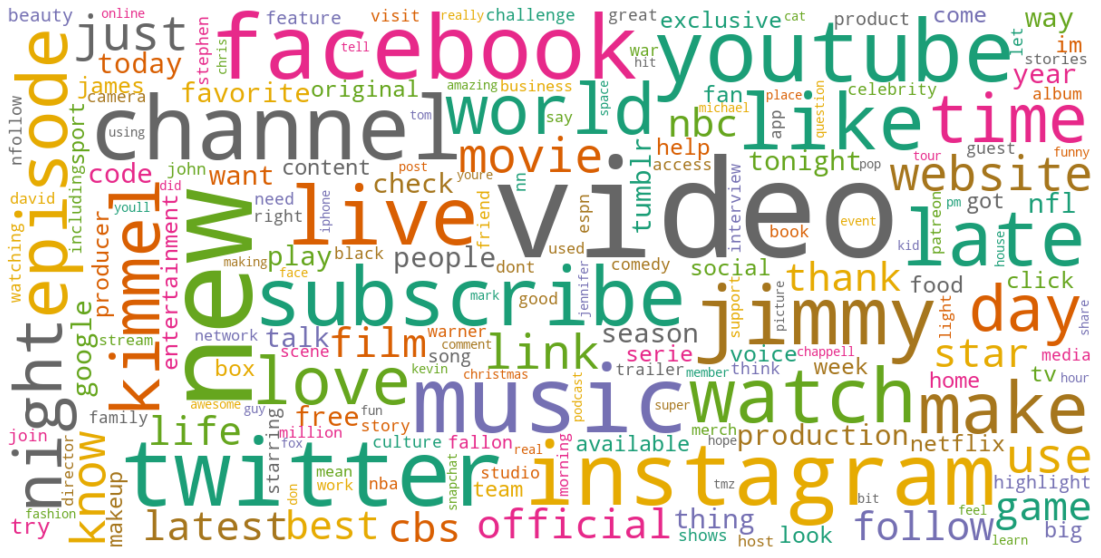

In [41]:
description_all=' '.join(description['description'])

wc2 = WordCloud(stopwords=text.ENGLISH_STOP_WORDS,background_color="white", colormap="Dark2",
               max_font_size=150, collocations=False,width=1200, height=600,random_state=41)
wc2.generate(description_all)

plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

- Trending Videos tends to include social medias on their description such as facebook, twitter, instagram. This suggest that the channels who published the trending videos tend to have a base for their viewers to keep in touch with them using other platforms other than Youtube.

## 8. How Does Each Features Correlates with Each Other?

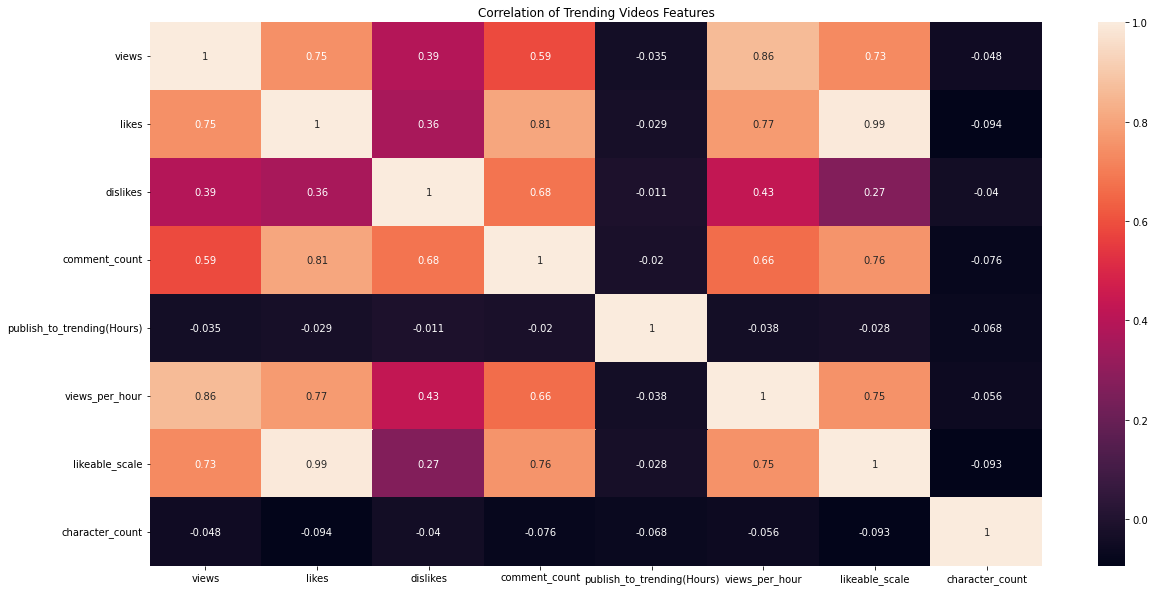

In [42]:
sns.heatmap(first_day_trending[['views','likes','dislikes','comment_count','publish_to_trending(Hours)','views_per_hour','likeable_scale','character_count']].corr(),annot=True)
plt.title('Correlation of Trending Videos Features')
plt.show()

- As a confirmation to the previous analysis, views is indeed positively correlated with likes, dislikes, and comment counts. But the correlation is highest with likes.

# IV. Modelling: Segmentation

## 1. Preparing the Data

### 1.1. Create the DataFrame

In [43]:
#Create Dataframe that contains the channel and the number of distinct videos they published that becomes trending in 2017-2018
channel=pd.DataFrame(first_day_trending['channel_title'].value_counts()).reset_index()
channel.columns=['channel_title','distinct_video']

#Create Dataframe that contains average time to trending and average views when first trending for each channel
avg_time_to_trending=pd.DataFrame(first_day_trending.groupby('channel_title')[['publish_to_trending(Hours)','views']].mean()).reset_index()
avg_time_to_trending.columns=['channel_title','avg_time_to_trending','avg_views']

#Create Dataframe that contains the average time their videos become trending for each channel
avg_trending_days=pd.DataFrame(df_sorted.groupby(['channel_title','title_videos'])['trending_days'].max()).reset_index()
avg_trending_days=pd.DataFrame(avg_trending_days.groupby('channel_title')['trending_days'].mean()).reset_index()
avg_trending_days.columns=['channel_title','avg_trending_days']

#Merge all three dataset
df_cluster=channel.merge(avg_time_to_trending, on='channel_title').merge(avg_trending_days, on='channel_title').set_index('channel_title')
df_cluster

,distinct_video,avg_time_to_trending,avg_views,avg_trending_days
channel_title,,,,
ESPN,84,48.223108,496953.880952,2.416667
TheEllenShow,74,44.015601,966796.135135,2.608108
The Tonight Show Starring Jimmy Fallon,72,41.111655,747330.013889,2.736111
Jimmy Kimmel Live,70,46.838722,903864.185714,2.657143
The Late Show with Stephen Colbert,58,49.834574,598374.275862,3.224138
...,...,...,...,...
WGA West,1,94.042500,12963.000000,5.000000
Seonkyoung Longest,1,25.145000,13596.000000,12.000000
Peaceful Cuisine,1,39.932222,42033.000000,5.000000


### 1.2. Standardize the Data

In [44]:
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

mm=MinMaxScaler()
ss=StandardScaler()
df_st=pd.DataFrame(mm.fit_transform(df_cluster.values),columns=df_cluster.columns,
                                 index=df_cluster.index)
df_st.describe()

,distinct_video,avg_time_to_trending,avg_views,avg_trending_days
count,2198.000000,2198.000000,2198.000000,2198.000000
mean,0.023334,0.014275,0.020446,0.205585
std,0.069694,0.083028,0.054749,0.151924
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000291,0.001542,0.111111
50%,0.000000,0.000425,0.005737,0.185185
75%,0.012048,0.000798,0.018303,0.259259
max,1.000000,1.000000,1.000000,1.000000


## 2. Determining the Number of Clusters

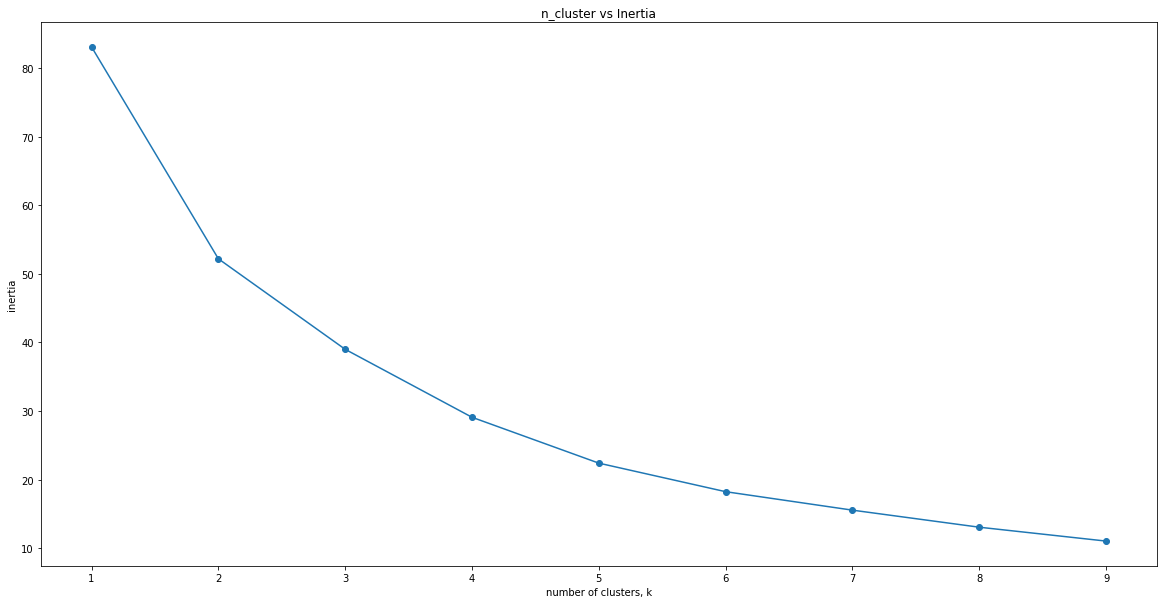

In [45]:
#df_st=df_st.drop('distinct_video',axis=1)
inertias = []

for k in range(1, 10):
    # Create a KMeans instance with k clusters: model
    model_kmeans = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_kmeans.fit(df_st)
    
    # Append the inertia to the list of inertias
    inertias.append(model_kmeans.inertia_)

plt.plot(range(1,10), inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.title('n_cluster vs Inertia')
plt.show()

## 3. Clustering

In [59]:
#Clustering
model_kmeans=KMeans(n_clusters=3)
label=model_kmeans.fit_predict(df_st)

df_st['label']=label
df_st['label']=label

## 4. Clustering Evaluation

In [60]:
#Evaluate clustering result
print('Silhouette Coefficient:',silhouette_score(df_st, label))

Silhouette Coefficient: 0.87425874152084


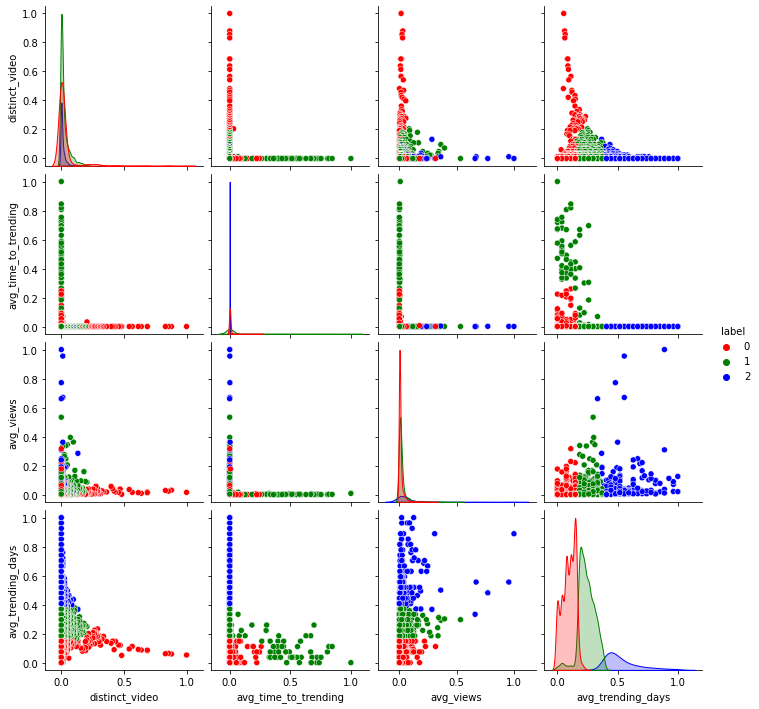

In [61]:
sns.pairplot(df_st,hue='label',palette={0:'red',1:'green',2:'blue'})
plt.show()

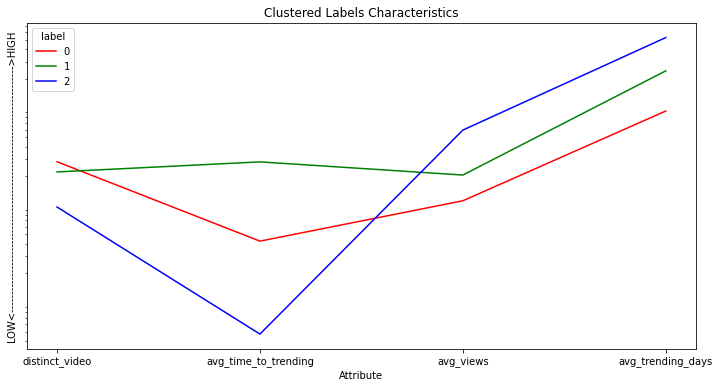

In [64]:

df_melt=pd.melt(df_st.reset_index(),
                                id_vars=['channel_title','label'],
                                value_vars=['distinct_video','avg_time_to_trending','avg_views','avg_trending_days'],
                                var_name='Attribute',
                                value_name='Value')
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x='Attribute',y='Value',hue='label',data=df_melt,ci=None,palette={0:'red',1:'green',2:'blue'},ax=ax)
plt.title('Clustered Labels Characteristics')
plt.yscale('log')
plt.yticks([])
plt.ylabel('LOW<-------------------------------------------------------------------->HIGH')
plt.show()

- The clusters have sillhouette score of 0.9/1.0, which shows strong clusters.
- The characteristics of the clusters are as follows:
  1.   Cluster 0: Have many trending videos, the average time for their videos to become trending is medium, the average views are relatively low, and average trending days is also low.
  2.   Cluster 1: The number of trending videos are lower than channels in cluster 1, but their avg time to trending is the longest, and the average views and the average trending days are higher and longer than cluster 0 but lower than cluster 2.
  3.   Cluster 2: The channels in this cluster have the lowest trending videos, but the shortest average time to trending. However, their average views and average trending days are the highest and longest.
